In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#they are use to build regression or classification models in the form of a tree structure.
#it breaks down a dataset into smaller and smaller subsets while at the same time
#an associated decision tree is incrementally developed
#the final result is a tree with decision nodes and leaf nodes
#disadvantage-it leads to overfitting

In [2]:
dataset=pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


In [3]:
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
import seaborn as sns

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

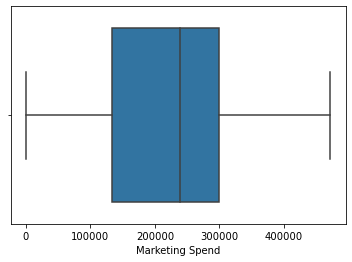

In [6]:
sns.boxplot(dataset['Marketing Spend'])

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

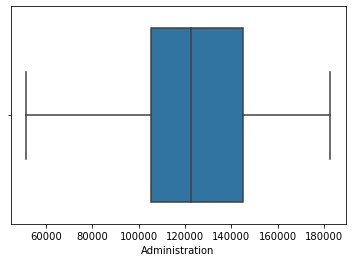

In [7]:
sns.boxplot(dataset['Administration'])

In [8]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


<AxesSubplot:>

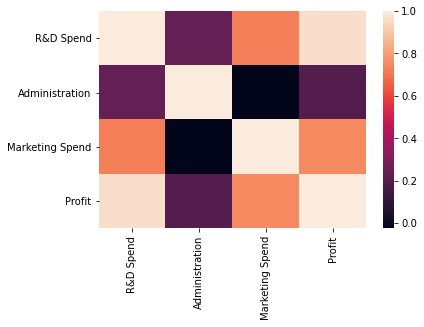

In [9]:
sns.heatmap(dataset.corr())#1 is high correlation

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

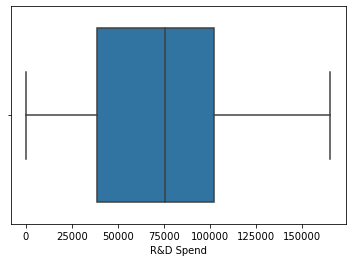

In [10]:
sns.boxplot(dataset['R&D Spend'])

C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

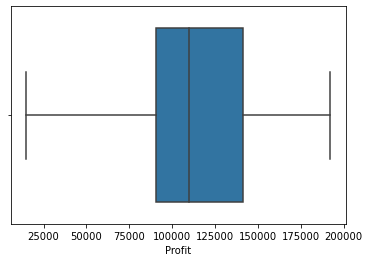

In [11]:
sns.boxplot(dataset['Profit'])

In [12]:
dataset.drop(49,axis=0,inplace=True)

In [13]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


In [14]:
x=dataset.iloc[:,0:4].values#2D
y=dataset.iloc[:,-1].values#1D

In [15]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [16]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41, 144259.4 , 141585.52, 134307.35, 132602.65, 129917.04,
       126992.93, 125370.37, 124266.9 , 122776.86, 118474.03, 111313.02,
       110352.25, 108733.99, 108552.04, 107404.34, 105733.54, 105008.31,
       103282.38, 101004.64,  99937.59,  97483.56,  97427.84,  96778.92,
        96712.8 ,  96479.51,  90708.19,  89949.14,  81229.06,  81005.76,
        78239.91,  77798.83,  71498.49,  69758.98, 

In [17]:
from sklearn.compose import ColumnTransformer   #operation in columns
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[3])],remainder='passthrough')  #100 is for france,001 is for spain,010 is used for germany
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [19]:
x.shape

(107, 5)

In [20]:
import joblib  #saving the encoding for further applications 
joblib.dump(ct,'onehot.save')#ct is the object variable

['onehot.save']

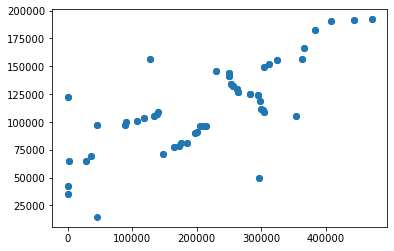

In [21]:
plt.scatter(x[:,4],y)# checking co-rellation

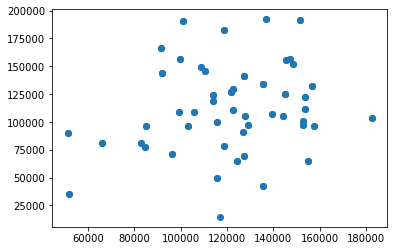

In [22]:
plt.scatter(x[:,3],y)

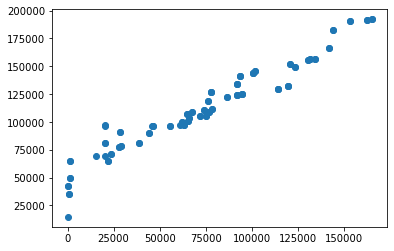

In [23]:
plt.scatter(x[:,2],y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt=DecisionTreeRegressor(criterion='mae',random_state=0)
dt

DecisionTreeRegressor(criterion='mae', random_state=0)

In [27]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', random_state=0)

In [28]:
y_pred=dt.predict(x_test)
y_pred

array([ 49490.75, 146121.95,  89949.14, 191050.39, 108552.04, 144259.4 ,
       124266.9 , 155752.6 , 126992.93,  35673.41,  99937.59, 105008.31,
        64926.08, 105008.31,  81229.06, 132602.65, 134307.35,  90708.19,
        42559.73, 126992.93, 132602.65, 152211.77])

In [29]:
y_test

array([ 49490.75, 146121.95,  89949.14, 191050.39, 108552.04, 144259.4 ,
       124266.9 , 155752.6 , 126992.93,  35673.41,  99937.59, 110352.25,
        64926.08, 110352.25,  81229.06, 132602.65, 134307.35,  96479.51,
        42559.73, 126992.93, 132602.65, 152211.77])

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9972209217863018

In [31]:
#plotting decision trees 
#pip install pydotplus in anaconda prompt to download a library

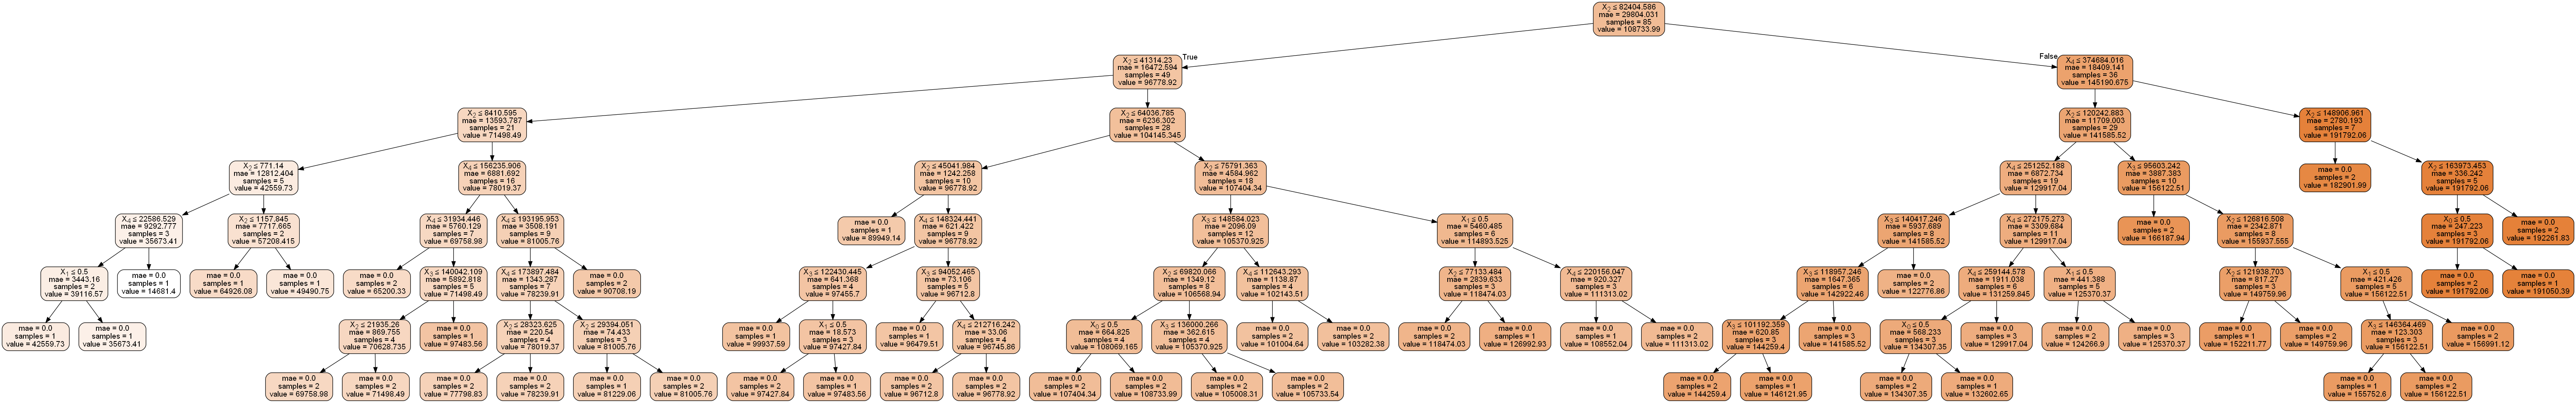

In [32]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mse

4110160.1813454535

In [35]:
from math import sqrt
sqrt(mse)

2027.3529987018674